In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning
from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models
from sklearn.metrics import r2_score   # for scoring the model 
from sklearn.linear_model import LinearRegression,Ridge,Lasso  # linear regression models
from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity
import statsmodels as sm   # contains good statistical tools for modeling

In [124]:
car = pd.read_csv("C:/Users/dsouz/Downloads/car.csv")

In [125]:
car.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [126]:
car['US Made'].unique()

array([1, 0], dtype=int64)

In [127]:
car.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'US Made'],
      dtype='object')

In [128]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [129]:
car_new = car

In [130]:
#Checking for null values. No null values were reported.

null_values = car_new.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(car_new)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
MPG,0,0.0
Cylinders,0,0.0
Displacement,0,0.0
Horsepower,0,0.0
Weight,0,0.0
Acceleration,0,0.0
Model Year,0,0.0
US Made,0,0.0


In [131]:
# we saw that the horsepower column is an object datatype
# checking what the odd value is in the horsepower column
car_new.Horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [132]:
# we see that the odd value is '?' representing null
# so we now change it to NaN value and fill the spot with the mean horsepower
car_new.Horsepower = car_new.Horsepower.str.replace('?','NaN').astype(float)
car_new.Horsepower.fillna(car_new.Horsepower.mean(),inplace=True)
car_new.Horsepower = car_new.Horsepower.astype(int)

# print the info of the data again to see the datatypes of columns
car_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    int32  
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


C:\Users\dsouz\AppData\Local\Temp\ipykernel_15944\2100861396.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_new.Horsepower = car_new.Horsepower.str.replace('?','NaN').astype(float)


In [133]:
car_new.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,0.625628
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.484569
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000


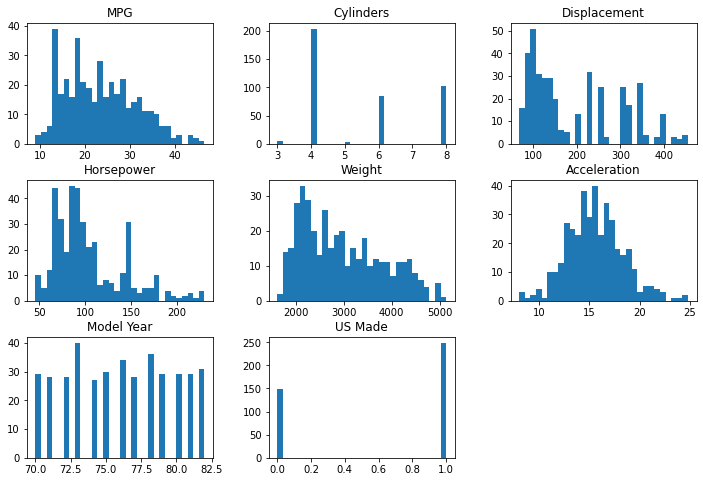

In [134]:
car_new.hist(figsize=(12,8),bins=30, grid = False)
plt.show()

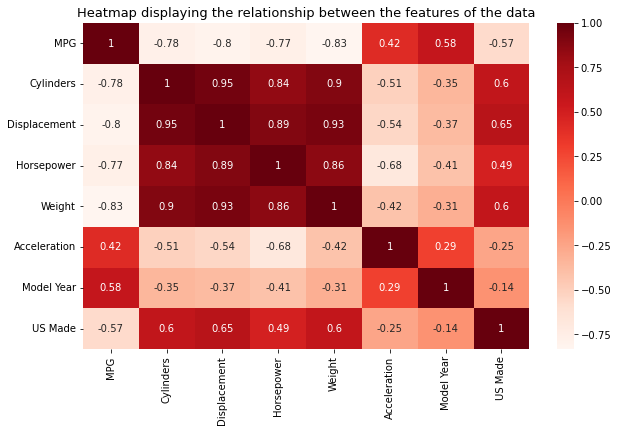

In [135]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and....
#.... the other features.
plt.figure(figsize=(10,6))
sns.heatmap(car_new.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

# Simple Linear Regression Analysis

In [136]:
X = car_new[['Cylinders']]
Y = car_new['MPG']

In [137]:
# Extracting independent variable target variables
lm = LinearRegression()

# fit in linear model
lm.fit( car_new[['Cylinders']], car_new['MPG'])

print("What is the value of the intercept (a)? \n {}".format(lm.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm.coef_))
print("\n Final estimated linear model")
print("Yhat=38162.86 - 809.27*X")
print("Price=38162.86 - 809.27*Cylinders")

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

Yhat=lm.predict(X)
mse = mean_squared_error(car_new['MPG'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

What is the value of the intercept (a)? 
 42.94931350439765
What is the value of the Slope (b)? 
 [-3.56288658]

 Final estimated linear model
Yhat=38162.86 - 809.27*X
Price=38162.86 - 809.27*Cylinders
The R-square is:  0.6012393994439938
The mean square error of price and predicted value is:  24.298923523599704


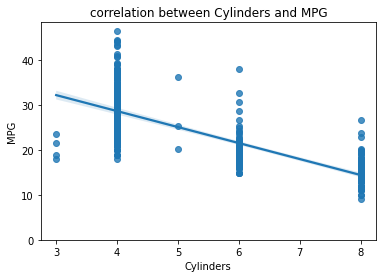

In [138]:
sns.regplot(x = 'Cylinders', y = 'MPG', data = car_new)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Cylinders and MPG")
plt.show()

In [139]:
X1 = car_new[['Displacement']]
Y1 = car_new['MPG']

In [140]:
# Extracting independent variable target variables
lm1 = LinearRegression()

# fit in linear model
lm1.fit( car_new[['Displacement']], car_new['MPG'])

print("What is the value of the intercept (a)? \n {}".format(lm.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm.coef_))
print("\n Final estimated linear model")
print("Yhat=42.95 - 3.56*X1")
print("Price=42.95 - 3.56*Displacement")

# Find the R^2
print('The R-square is: ', lm1.score(X1, Y1))

Yhat1=lm.predict(X1)
mse = mean_squared_error(car_new['MPG'], Yhat1)
print('The mean square error of price and predicted value is: ', mse)

What is the value of the intercept (a)? 
 42.94931350439765
What is the value of the Slope (b)? 
 [-3.56288658]

 Final estimated linear model
Yhat=42.95 - 3.56*X1
Price=42.95 - 3.56*Displacement
The R-square is:  0.6467421834257859
The mean square error of price and predicted value is:  581593.6160866128


C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Displacement
Feature names seen at fit time, yet now missing:
- Cylinders

  warnings.warn(message, FutureWarning)


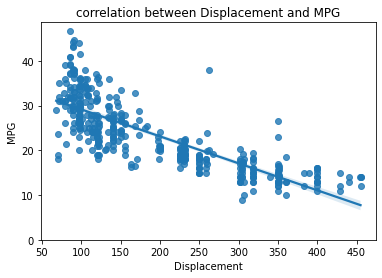

In [141]:
sns.regplot(x = 'Displacement', y = 'MPG', data = car_new)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Displacement and MPG")
plt.show()

In [142]:
X2 = car_new[['Horsepower']]
Y2 = car_new['MPG']

In [143]:
# Extracting independent variable target variables
lm2 = LinearRegression()

# fit in linear model
lm2.fit( car_new[['Horsepower']], car_new['MPG'])

print("What is the value of the intercept (a)? \n {}".format(lm2.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm2.coef_))
print("\n Final estimated linear model")
print("Yhat=40.00 - 0.15*X2")
print("Price=40.00 - 0.15*Horsepower")

# Find the R^2
print('The R-square is: ', lm2.score(X2, Y2))

Yhat2=lm.predict(X2)
mse = mean_squared_error(car_new['MPG'], Yhat2)
print('The mean square error of price and predicted value is: ', mse)

What is the value of the intercept (a)? 
 40.00563948071617
What is the value of the Slope (b)? 
 [-0.15786619]

 Final estimated linear model
Yhat=40.00 - 0.15*X2
Price=40.00 - 0.15*Horsepower
The R-square is:  0.595278359694004
The mean square error of price and predicted value is:  141334.55704379213


C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Horsepower
Feature names seen at fit time, yet now missing:
- Cylinders

  warnings.warn(message, FutureWarning)


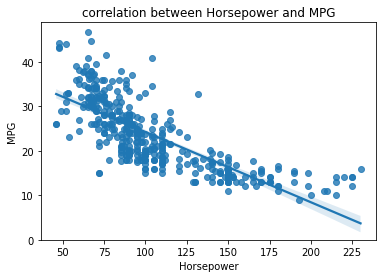

In [144]:
sns.regplot(x = 'Horsepower', y = 'MPG', data = car_new)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Horsepower and MPG")
plt.show()

In [145]:
X3 = car_new[['Weight']]
Y3 = car_new['MPG']

In [146]:
# Extracting independent variable target variables
lm3 = LinearRegression()

# fit in linear model
lm3.fit( car_new[['Weight']], car_new['MPG'])

print("What is the value of the intercept (a)? \n {}".format(lm3.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm3.coef_))
print("\n Final estimated linear model")
print("Yhat=46.32 - 0.01*X3")
print("Price=46.32 - 0.01*Weight")

# Find the R^2
print('The R-square is: ', lm3.score(X3, Y3))

Yhat3=lm.predict(X3)
mse = mean_squared_error(car_new['MPG'], Yhat3)
print('The mean square error of price and predicted value is: ', mse)

What is the value of the intercept (a)? 
 46.31736442026565
What is the value of the Slope (b)? 
 [-0.00767661]

 Final estimated linear model
Yhat=46.32 - 0.01*X3
Price=46.32 - 0.01*Weight
The R-square is:  0.6917929800341573
The mean square error of price and predicted value is:  120636514.81587599


C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Weight
Feature names seen at fit time, yet now missing:
- Cylinders

  warnings.warn(message, FutureWarning)


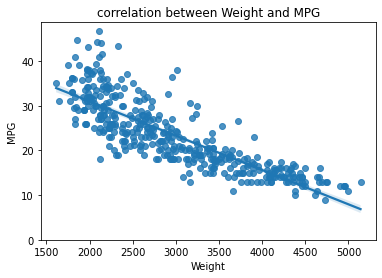

In [147]:
sns.regplot(x = 'Weight', y = 'MPG', data = car_new)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Weight and MPG")
plt.show()

In [148]:
X4 = car_new[['Acceleration']]
Y4 = car_new['MPG']

In [149]:
# Extracting independent variable target variables
lm4 = LinearRegression()

# fit in linear model
lm4.fit( car_new[['Acceleration']], car_new['MPG'])

print("What is the value of the intercept (a)? \n {}".format(lm4.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm4.coef_))
print("\n Final estimated linear model")
print("Yhat=4.97 + 1.19*X4")
print("Price=4.97 + 1.19*Acceleration")

# Find the R^2
print('The R-square is: ', lm4.score(X4, Y4))

Yhat4=lm.predict(X4)
mse = mean_squared_error(car_new['MPG'], Yhat4)
print('The mean square error of price and predicted value is: ', mse)

What is the value of the intercept (a)? 
 4.969793004253901
What is the value of the Slope (b)? 
 [1.19120453]

 Final estimated linear model
Yhat=4.97 + 1.19*X4
Price=4.97 + 1.19*Acceleration
The R-square is:  0.176642769635589
The mean square error of price and predicted value is:  1519.968678414339


C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Acceleration
Feature names seen at fit time, yet now missing:
- Cylinders

  warnings.warn(message, FutureWarning)


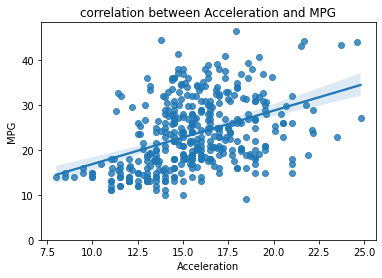

In [150]:
sns.regplot(x = 'Acceleration', y = 'MPG', data = car_new)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Acceleration and MPG")
plt.show()

In [151]:
X5 = car_new[['Model Year']]
Y5 = car_new['MPG']

In [152]:
# Extracting independent variable target variables
lm5 = LinearRegression()

# fit in linear model
lm5.fit( car_new[['Model Year']], car_new['MPG'])

print("What is the value of the intercept (a)? \n {}".format(lm5.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm5.coef_))
print("\n Final estimated linear model")
print("Yhat=-69.55 + 1.22*X5")
print("Price=-69.55 + 1.22*Model Year")

# Find the R^2
print('The R-square is: ', lm5.score(X5, Y5))

Yhat5=lm.predict(X5)
mse = mean_squared_error(car_new['MPG'], Yhat5)
print('The mean square error of price and predicted value is: ', mse)

What is the value of the intercept (a)? 
 -69.5556017419577
What is the value of the Slope (b)? 
 [1.22444564]

 Final estimated linear model
Yhat=-69.55 + 1.22*X5
Price=-69.55 + 1.22*Model Year
The R-square is:  0.33555041147055686
The mean square error of price and predicted value is:  63545.1836993112


C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Model Year
Feature names seen at fit time, yet now missing:
- Cylinders

  warnings.warn(message, FutureWarning)


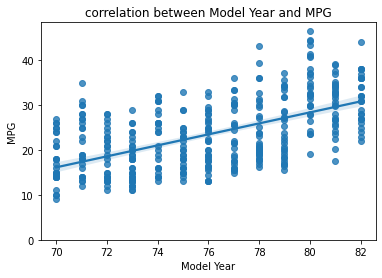

In [153]:
sns.regplot(x = 'Model Year', y = 'MPG', data = car_new)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between Model Year and MPG")
plt.show()

In [154]:
X6 = car_new[['US Made']]
Y6 = car_new['MPG']

In [155]:
# Extracting independent variable target variables
lm6 = LinearRegression()

# fit in linear model
lm6.fit( car_new[['US Made']], car_new['MPG'])

print("What is the value of the intercept (a)? \n {}".format(lm6.intercept_))
print("What is the value of the Slope (b)? \n {}".format(lm6.coef_))
print("\n Final estimated linear model")
print("Yhat=29.25 - 9.16*X6")
print("Price=29.25 - 9.16*US Made")

# Find the R^2
print('The R-square is: ', lm6.score(X6, Y6))

Yhat6=lm.predict(X6)
mse = mean_squared_error(car_new['MPG'], Yhat6)
print('The mean square error of price and predicted value is: ', mse)

What is the value of the intercept (a)? 
 29.248322147651006
What is the value of the Slope (b)? 
 [-9.16478801]

 Final estimated linear model
Yhat=29.25 - 9.16*X6
Price=29.25 - 9.16*US Made
The R-square is:  0.32284162620958035
The mean square error of price and predicted value is:  344.6495171167164


C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- US Made
Feature names seen at fit time, yet now missing:
- Cylinders

  warnings.warn(message, FutureWarning)


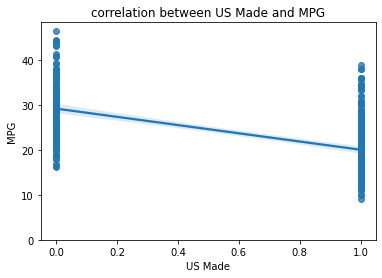

In [156]:
sns.regplot(x = 'US Made', y = 'MPG', data = car_new)
plt.ylim(0,) # y axis starts from zero
plt.title("correlation between US Made and MPG")
plt.show()

In [157]:
# We can also check for multicollinearity using the variance inflation factor.
# A variable/feature affected by multicollinearity will have a value greater than 5....
#When we print out the series from the variance inflation factor
# We will have to do a feature selection to get rid of the multicollinearity.

X1 = sm.tools.add_constant(car_new) 

series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],
                  index=X1.columns)

series1

const           763.826135
MPG               5.696995
Cylinders        10.720732
Displacement     23.440316
Horsepower        9.064351
Weight           13.697920
Acceleration      2.514857
Model Year        2.035559
US Made           2.092917
dtype: float64

In [158]:
# Let's drop the columns that highly correlate with each other
newcars = car_new.drop(['Cylinders','Displacement','Weight'],axis=1)

# Let's do the variance inflation factor method again after doing a feature selection....
#..... to see if there's still multicollinearity.
X2 = sm.tools.add_constant(newcars)

series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],
                  index=X2.columns)

series2

const           691.334050
MPG               4.022831
Horsepower        4.139860
Acceleration      2.023937
Model Year        1.663176
US Made           1.614039
dtype: float64

# Training the regression model

In [104]:
X = newcars.drop('MPG', axis =1)
y = newcars.MPG

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

#fitting the model with the training data
lm.fit(X_train,y_train)

LinearRegression()

In [105]:
linear_pred = lm.predict(X_test)  # make prediction with the fitted model

# score the model on the train set
print('Train score: {}\n'.format(lm.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(lm.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7545138631805501

Test score: 0.7364956363194721

Overall model accuracy: 0.7364956363194721

Mean Squared Error: 16.838424922748192


In [106]:
# let's fit a ridge regression model and see if we can get a higher accuracy
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train)  # fit the model with the training data

ridge_pred = ridge.predict(X_test)  # make predictions

# score the model to check the accuracy
print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 0.7545138612912874

Test score: 0.7364908557668036

Overall model accuracy: 0.7364908557668036

Mean Squared Error: 16.83873040906376


In [107]:
# we now try to tune the parameters of the ridge model for a better accuracy
# we use a grid search to find the best parameters for the ridge model
ridge_model = Ridge()

param = {'alpha':[0,0.1,0.01,0.001,1]}  # define the parameters

# initialize the grid search
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)

ridge_search.fit(X_train,y_train)   # fit the model 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [108]:
# print out the best parameter for ridge and score it on the test and train data
print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {}'.format(ridge_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 1}
Train score: 0.7544957243210536

Test score: 0.7360094069985532


In [109]:
# let's try and fit a Lasso model for the regression
# here, we just move on to making the grid search and find the best parameters
lasso = Lasso()

param['max_iter'] = [1000,10000,100000,1000000]

lasso_search = GridSearchCV(lasso,param,cv=5,n_jobs=-1) # initialize the grid search

lasso_search.fit(X_train,y_train)  # fit the model

# print out the best parameters and score it 
print('Best parameter found:\n{}\n'.format(lasso_search.best_params_))
print('Train score: {}\n'.format(lasso_search.score(X_train,y_train)))
print('Test score: {}'.format(lasso_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 0.01, 'max_iter': 1000}

Train score: 0.7545041861171667

Test score: 0.7360352872089111


C:\Users\dsouz\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


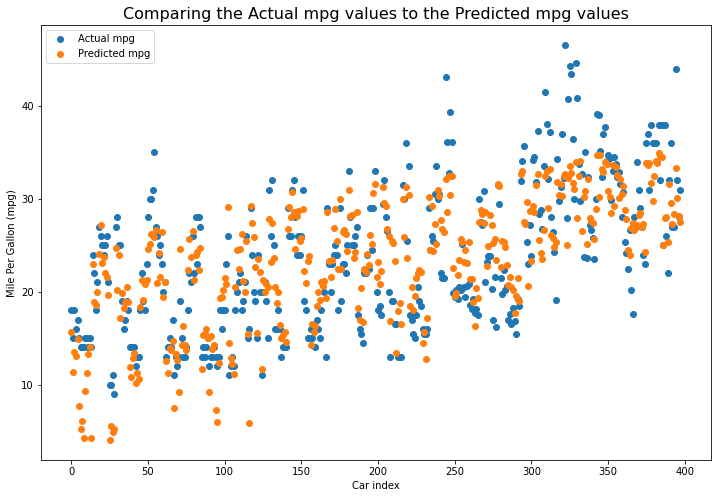

In [118]:
# we will now try to make predictions and see how well our model predicts
# we will visualize the actual mpg values recorded and the mpg values predicted by our 
# model to see how close our predictions are to the actual values.

newcars_new = newcars.drop('MPG',axis=1)  # create a new DataFrame of the feature variables

# make a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':newcars.MPG.values,
                    'Predicted mpg':lm.predict(newcars_new.values)})


# make a scatter plot of the actual and the predicted mpg of a car
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comparing the Actual mpg values to the Predicted mpg values',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

In [159]:
data['Residuals'] = data['Actual mpg']-data['Predicted mpg']
data

,Actual mpg,Predicted mpg,Residuals
0,18.0,15.665999,2.334001
1,15.0,11.362427,3.637573
2,18.0,13.469465,4.530535
3,16.0,13.101755,2.898245
4,17.0,14.935442,2.064558
...,...,...,...
393,27.0,28.377538,-1.377538
394,44.0,33.315245,10.684755
395,32.0,30.104802,1.895198
396,28.0,28.171894,-0.171894
